In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
hr=pd.read_csv("/content/turnover.csv")

In [5]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#lets find out if there are missing values or not?
hr.isnull().sum()
#no missing values.The data is clean

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [9]:
# finding how many employee have left the company as per the dataset
hr_left=pd.DataFrame(hr['left'].value_counts())
hr_left

,count
left,
0,11428
1,3571


In [10]:
import seaborn as sns

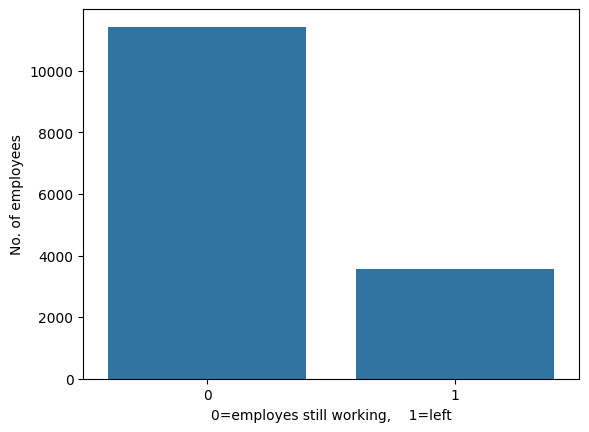

In [11]:
sns.barplot(x=hr_left.index, y=hr_left["count"])
plt.xlabel('0=employes still working,    1=left')
plt.ylabel('No. of employees')
plt.show()

In [12]:
#finding in terms of percentage
hr_left['count']=hr_left['count'].apply(lambda x: x/hr_left['count'].sum())
hr_left

,count
left,
0,0.761917
1,0.238083


<Axes: xlabel='left', ylabel='count'>

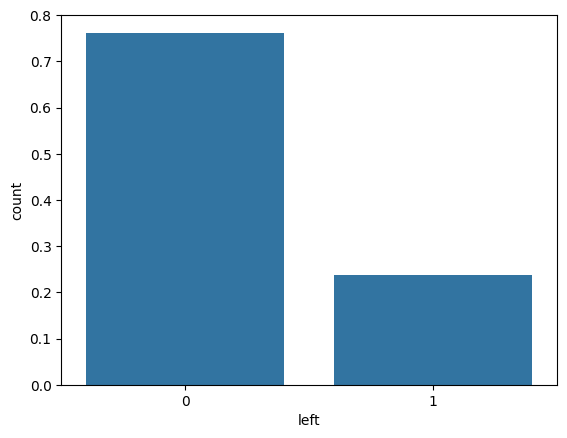

In [13]:
sns.barplot(x=hr_left.index, y=hr_left["count"])

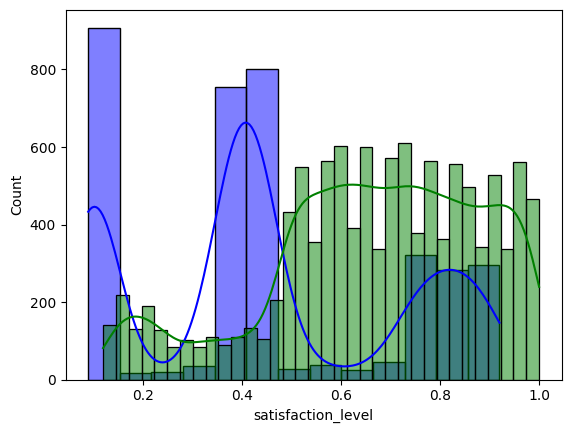

In [20]:
hr_satisfaction=hr[['satisfaction_level','left']]
hr_satisfaction_left=hr_satisfaction[(hr_satisfaction['left']==1)]
hr_satisfaction_stayed=hr_satisfaction[(hr_satisfaction['left']==0)]
sns.histplot(hr_satisfaction[(hr_satisfaction['left']==1)]['satisfaction_level'],color='b',kde=True)
sns.histplot(hr_satisfaction[(hr_satisfaction['left']==0)]['satisfaction_level'],color='g',kde=True)
plt.show()

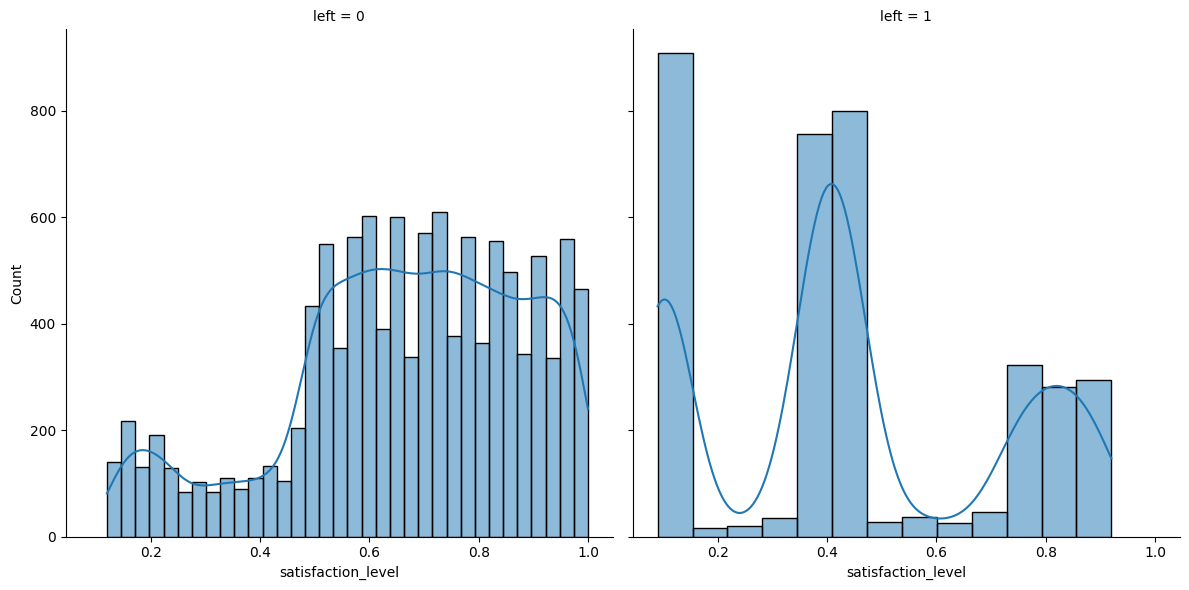

In [21]:
g=sns.FacetGrid(hr,col='left',height=6)
g.map(sns.histplot,'satisfaction_level',kde=True)

In [22]:
#large number of people who had lower satisfaction levels, have left the company
#Especially, people who have satisfaction level less than 0.5
#But there is also a surge in at higher level of satisfaction.

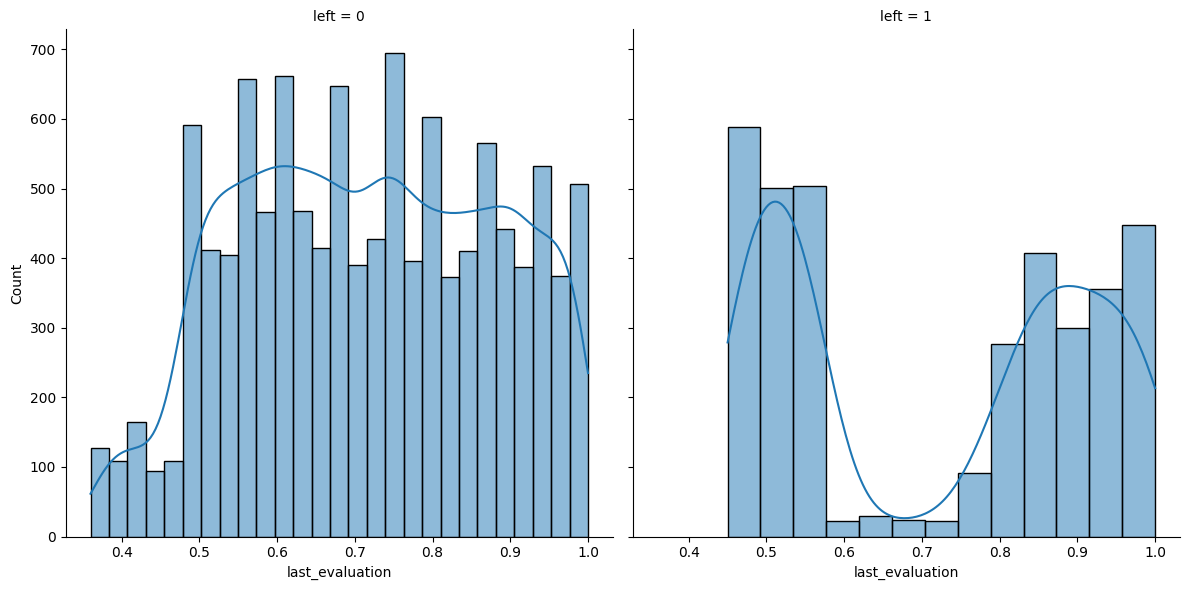

In [24]:
g=sns.FacetGrid(hr,col='left',height=6)
g.map(sns.histplot,'last_evaluation',kde=True)
plt.show()
#People with low evaluation and very high evaluation are leaving,
#where as people with average evaluation scores are staying back. That seems interesting.

In [25]:
#People with low evaluation and very high evaluation are leaving,
#where as people with average evaluation scores are staying back.

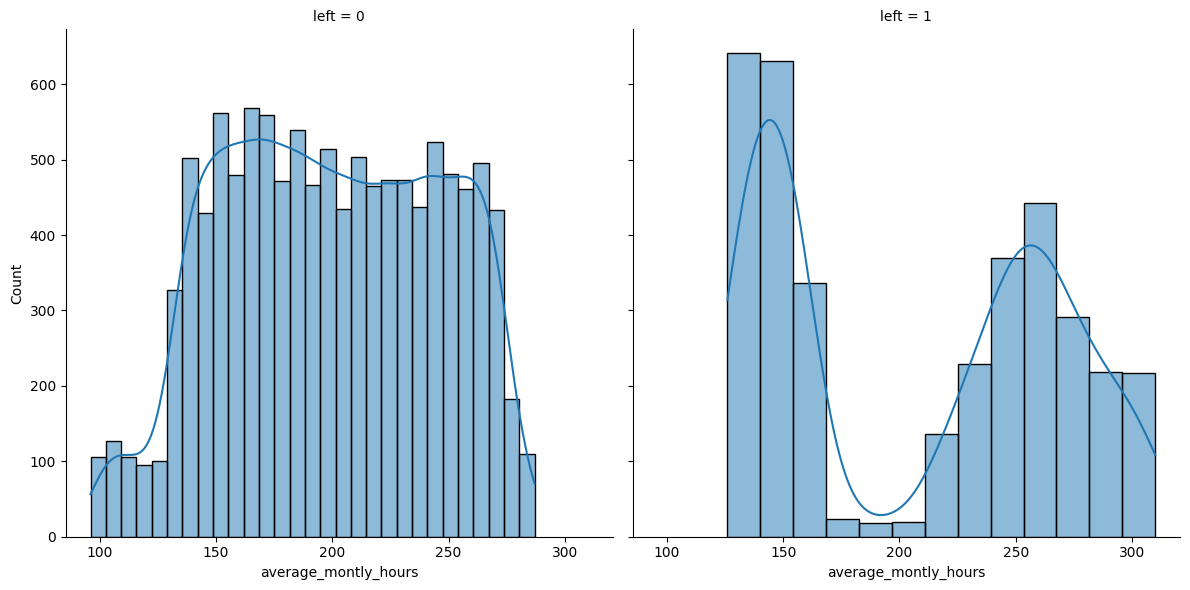

In [27]:
g=sns.FacetGrid(hr,col='left',height=6)
g.map(sns.histplot,'average_montly_hours',kde=True)

In [28]:
 # with an avg monthly hours of 200, very low employees are leaving

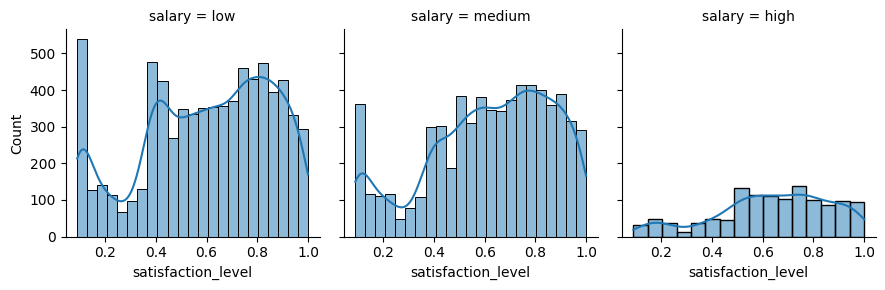

In [29]:
#how is satisfaction level related to average_monthly_hours
g=sns.FacetGrid(hr,col='salary')
g.map(sns.histplot,'satisfaction_level',kde=True)

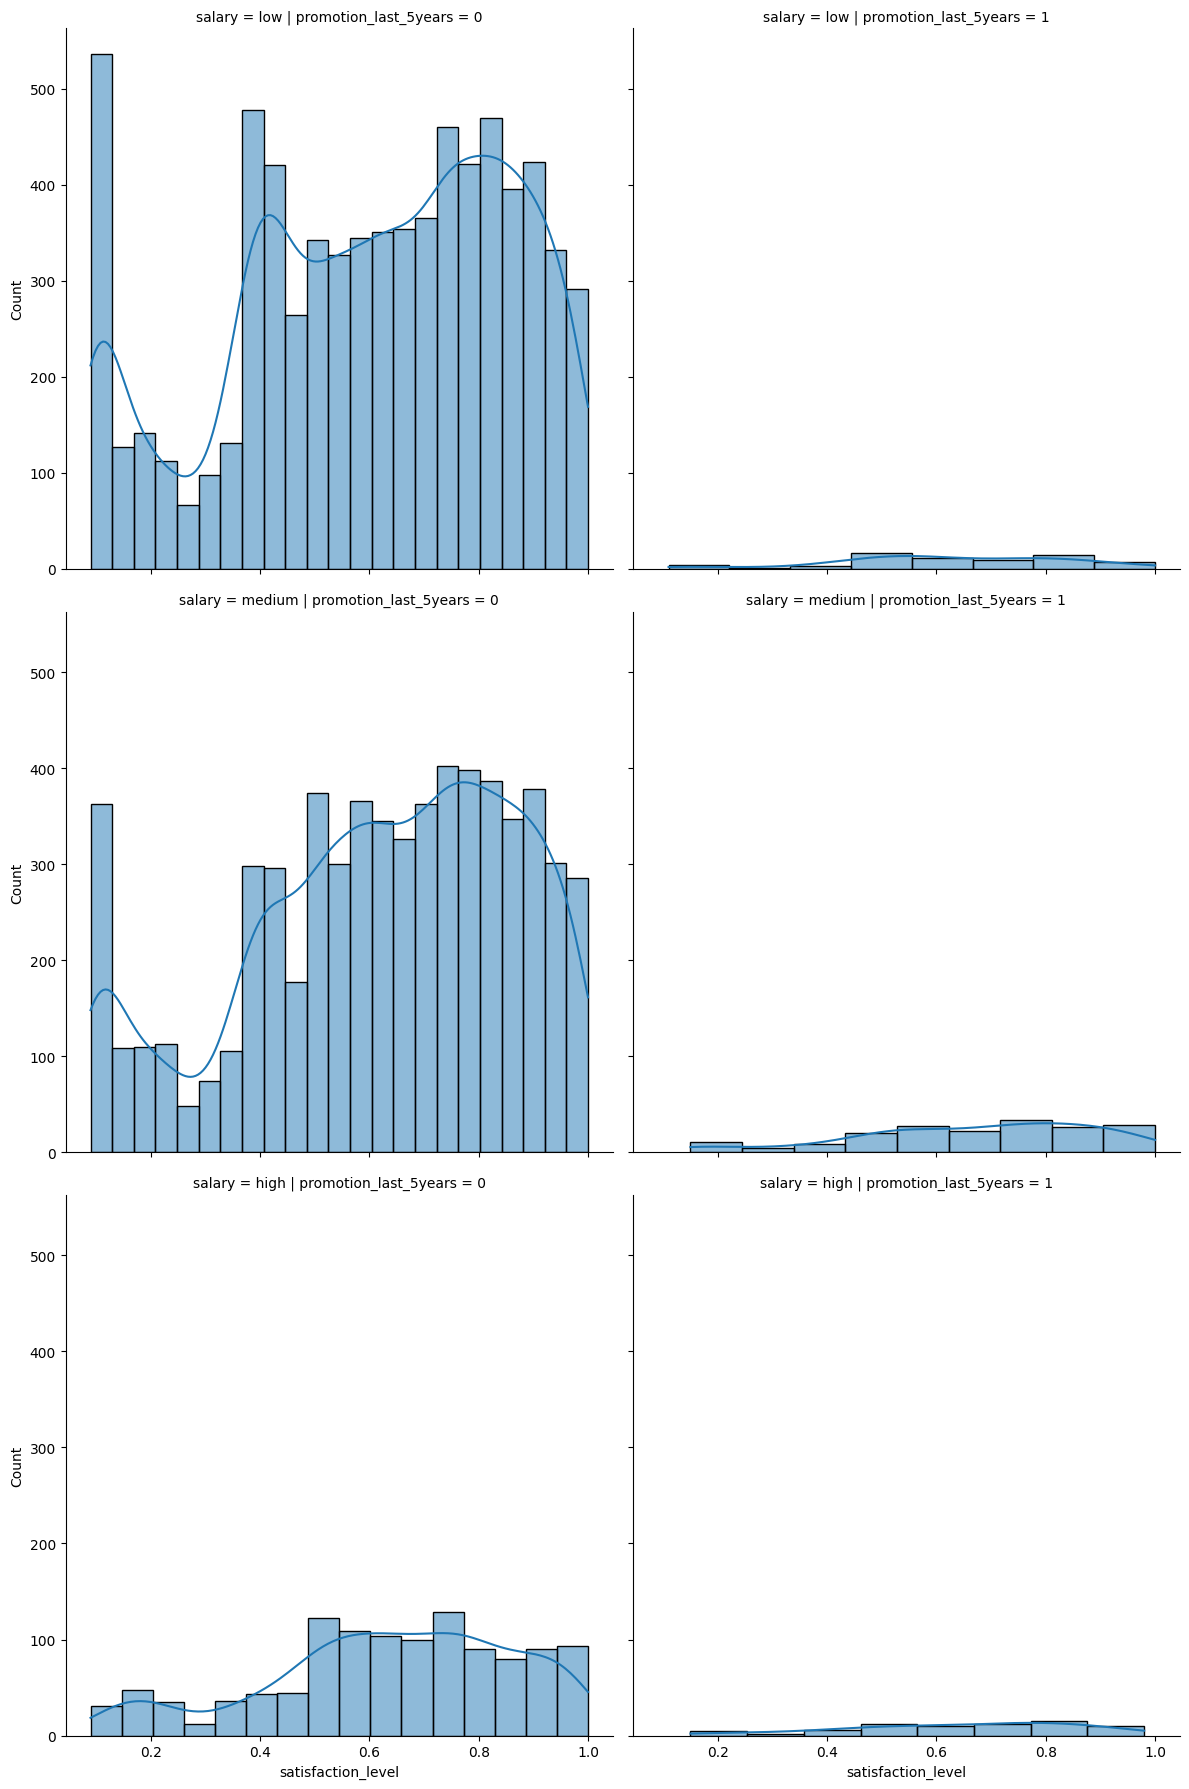

In [76]:
# how promotion and satisfaction level are associated
g=sns.FacetGrid(hr,col='promotion_last_5years',row='salary',height=6)
g.map(sns.histplot,'satisfaction_level',kde=True)

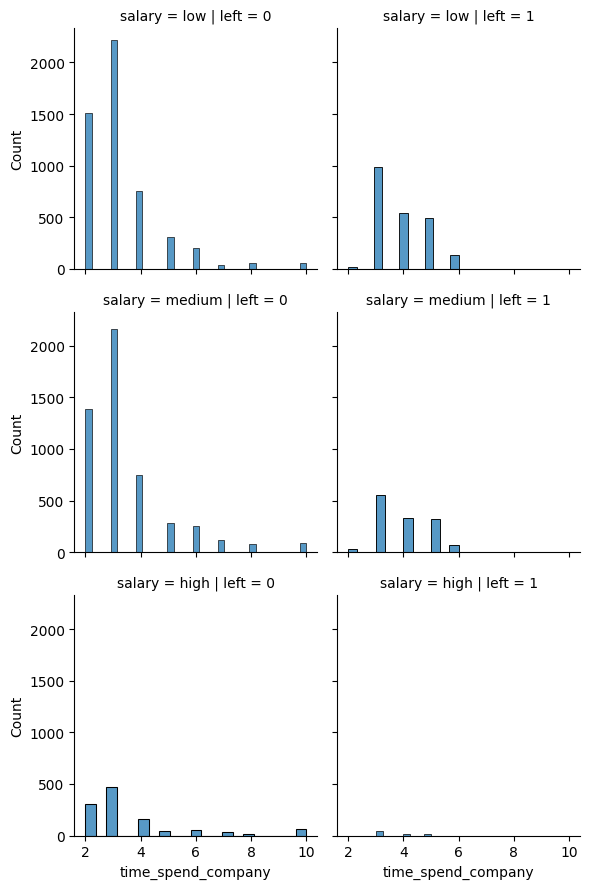

In [98]:
g=sns.FacetGrid(hr,col='left',row='salary')
g.map(sns.histplot,'time_spend_company')

In [78]:
#sales on left
hr_sales=hr[['sales','left']].groupby(['sales','left']).size().reset_index()
hr_sales.columns=['sales','left','count']
hr_sales

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


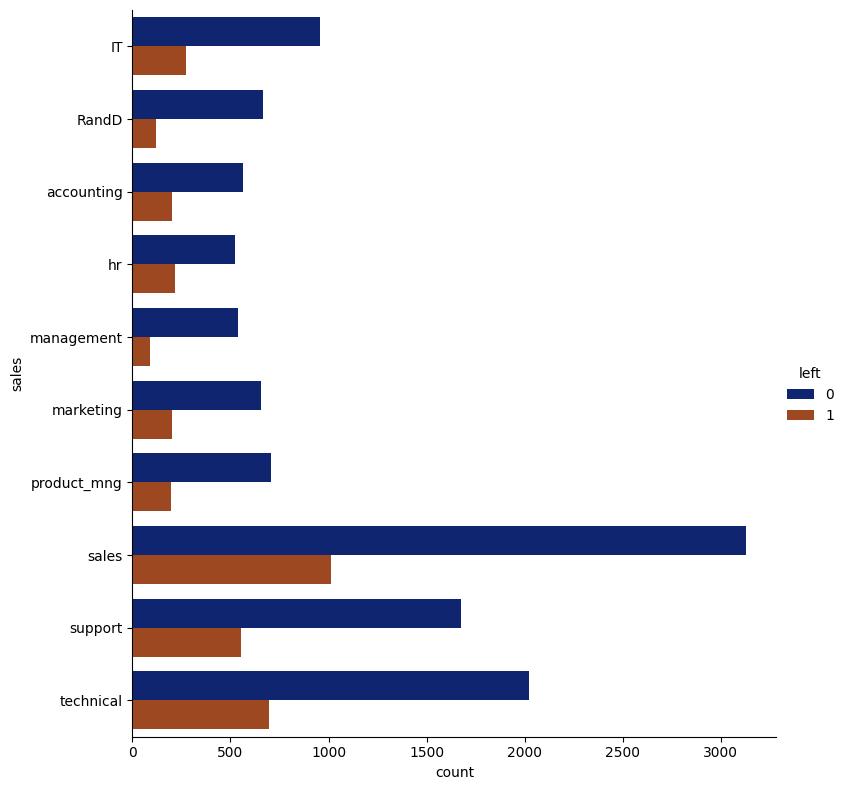

In [81]:
sns.catplot(x='count',y='sales',hue='left',data=hr_sales,kind='bar',height=8,palette='dark')

In [83]:
#how salaries accross department are related to employees leaving the company
hr_salaries=hr[['sales','salary']].groupby(['sales','salary']).size().reset_index()
hr_salaries.columns=['sales','salary','count']
hr_salaries

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [87]:
hr_sales=hr[['sales','left']].groupby(['sales','left']).size().reset_index()
hr_sales.columns=['sales','left','count']
hr_sales = hr_sales[['sales', 'left', 'count']]
hr_sales

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


In [91]:
#how salaries accross department are related to employees leaving the company
hr_salaries=hr[['sales','salary']].groupby(['sales','salary']).size().reset_index()
hr_salaries.columns=['sales','salary','count']
hr_salaries

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


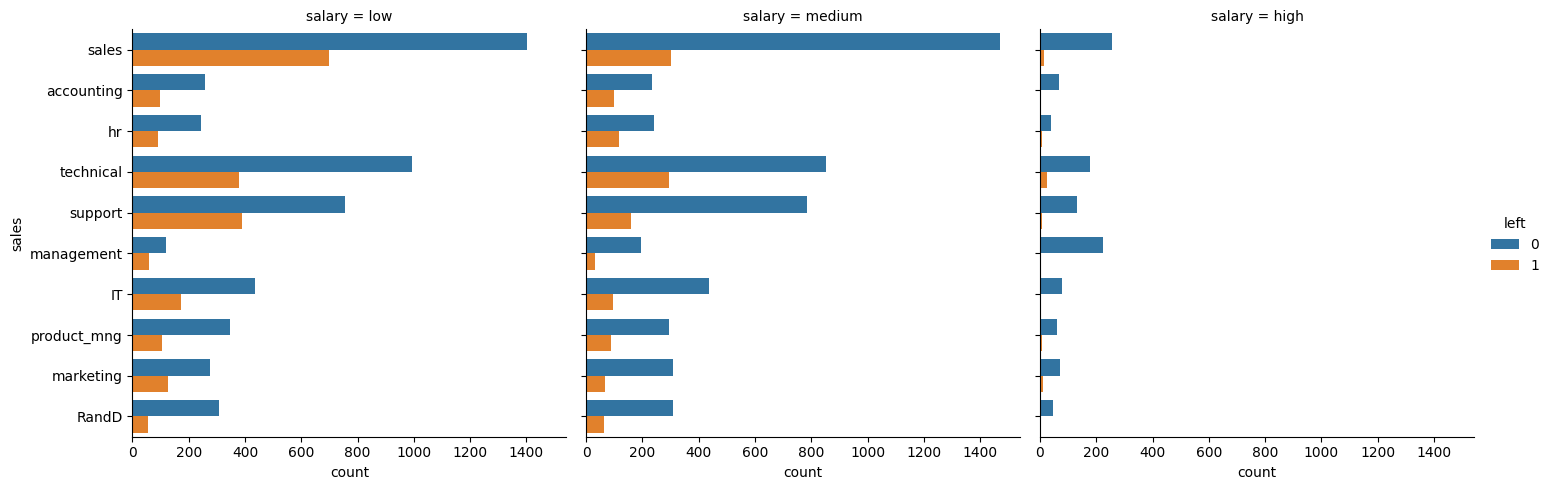

In [93]:
sns.catplot(y='sales',col='salary',hue='left',data=hr,kind='count')

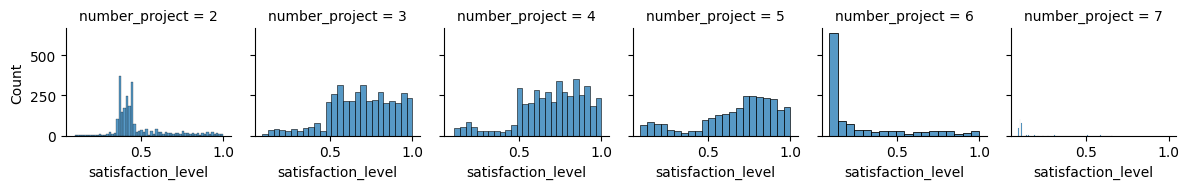

In [97]:
#finding relation between number of projects  and satisfaction level
g=sns.FacetGrid(hr,col='number_project',height=2)
g.map(sns.histplot,'satisfaction_level')

In [99]:
#with project no == 3,4,5 there seems to be a good satisfaction level
#with increase in projects==6,7 satisfaction_level becomes low

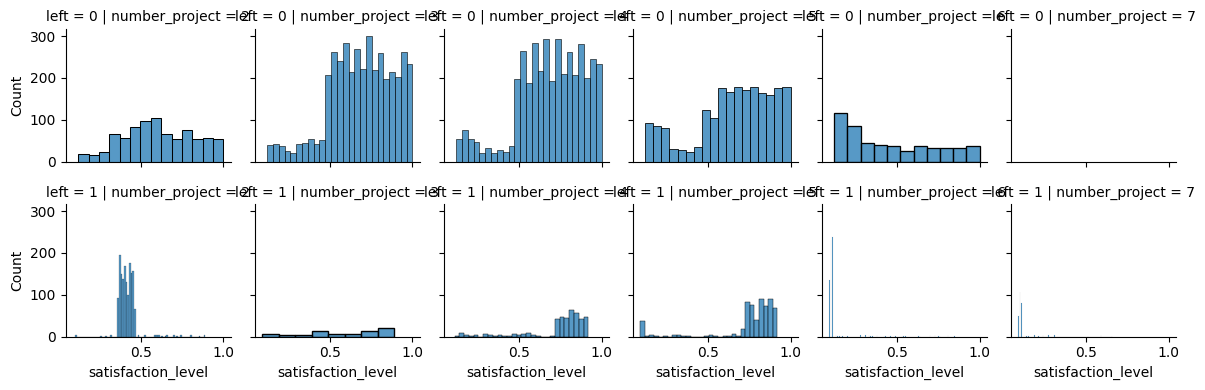

In [100]:
g=sns.FacetGrid(hr,col='number_project',row='left',height=2)
g.map(sns.histplot,'satisfaction_level')

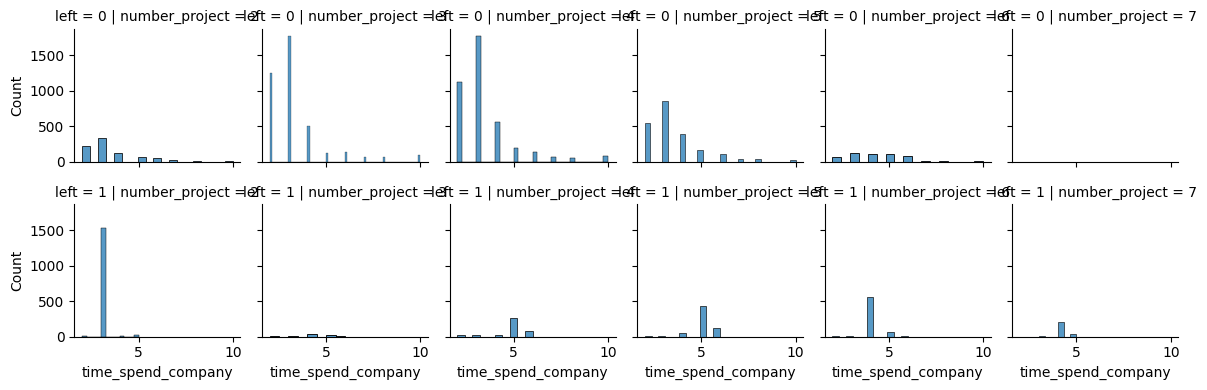

In [101]:
g=sns.FacetGrid(hr,col='number_project',row='left',height=2)
g.map(sns.histplot,'time_spend_company')

In [102]:
#people leave after 2 years as they might be looking for othr opportunity
# do not overburdern your valuable employee by giving him 6,7 projects .He'll most likely leave

<Axes: title={'center': 'satisfaction_level'}, xlabel='time_spend_company'>

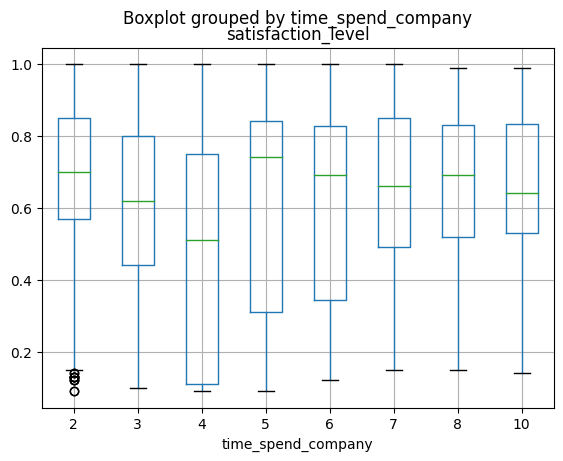

In [103]:
hr.boxplot('satisfaction_level',by='time_spend_company')

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

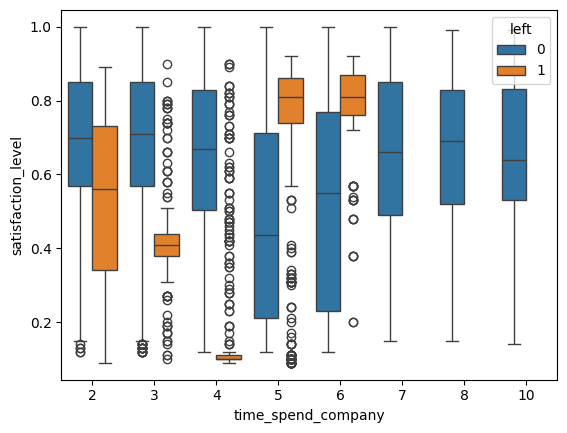

In [104]:
sns.boxplot(x='time_spend_company',y='satisfaction_level',hue='left',data=hr)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
variables=['salary','sales']
for var in variables:
    hr[var]=le.fit_transform(hr[var])

In [111]:
kf = KFold(n_splits=6, shuffle=True, random_state=8)
lr =RandomForestClassifier()
accuracies = cross_val_score(lr,hr[['satisfaction_level','number_project','time_spend_company','Work_accident','salary','sales']], hr["left"], scoring="accuracy", cv=kf)
accuracies.mean()

0.978065039349073

In [112]:
lr.fit(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']],hr[['left']])
predicted_value=lr.predict(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']])
prob=lr.predict_proba(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [113]:
hr['predicted_value']=predicted_value
hr[['left','predicted_value']].head(10)

,left,predicted_value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [115]:
from sklearn import metrics
cm = metrics.confusion_matrix( hr['left'],hr['predicted_value'], labels=[1,0] ) # Changed the third argument to be a keyword argument
cm

array([[ 3430,   141],
       [  165, 11263]])

Text(77.92222222222227, 0.5, 'Actual')

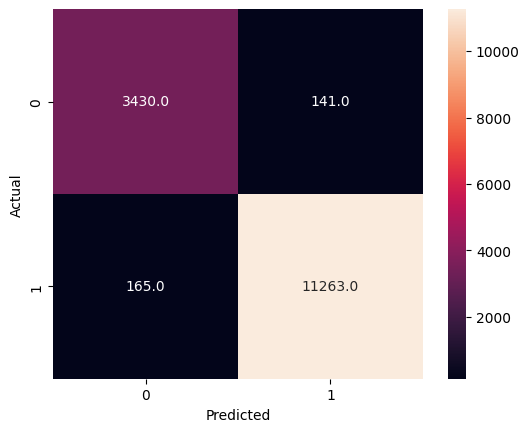

In [116]:
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [117]:
True_positive=11259
True_negative=3422
False_positive=149
False_negative=169

In [118]:
sensitivity=True_positive/(True_positive+False_negative)
sensitivity

0.9852117605880294

In [119]:
specificity=True_negative/(True_negative+False_positive)
specificity

0.9582749929991599

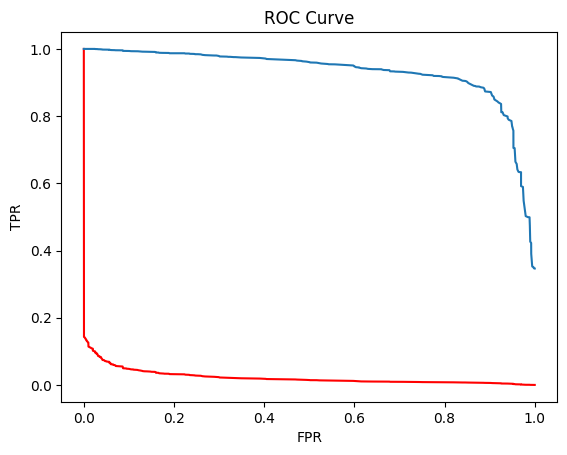

In [120]:
fpr,tpr,threshold=metrics.roc_curve(hr['left'],prob[:,1])
plt.plot(threshold,fpr,c='r')
plt.plot(threshold,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
#It is a plot of the true positive rate against the false positive rate for the different possible thresholds of a diagnostic test.

In [121]:
#seems to be the best case senario

In [122]:
auc_score = metrics.roc_auc_score(hr["left"], prob[:,1])
auc_score

0.9970591203180993

In [123]:
#when auc tends to 1 it means we are nearing a perfect classifier